Intentare aplicar el analisis de datos dentro del entorno de basketball

##Extraccion de Datos

Importare las siguientes librerias:
* Pandas: Manipulacion de datos;
* Numpy: Operaciones Matematicas;
* MatPlotLib: Visualizar graficos;
* Seaborn: Visualizar Graficos;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

El primer paso es importar los datos al notebook, utilizamos la funcion read_csv(), ademas utilizaremos la funcion head() para una visualizacion rapida de las variables

In [ ]:
miami = pd.read_csv('DfBasket.csv')
miami.head()

,Starters,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Jimmy Butler\butleji01,33:25,8,13,0.615,2,4,0.500,5,5,...,0,2,2,5,2,0,2,0,23,-14
1,Duncan Robinson\robindu01,27:03,0,3,0.000,0,3,0.000,0,0,...,0,4,4,0,0,0,0,2,0,-8
2,Jae Crowder\crowdja01,24:30,4,8,0.500,4,7,0.571,0,0,...,0,2,2,0,0,2,0,3,12,-21
3,Bam Adebayo\adebaba01,21:10,2,8,0.250,0,0,NaN,4,6,...,2,2,4,0,0,0,0,2,8,-12
4,Goran Dragić\dragigo01,14:50,3,8,0.375,0,1,0.000,0,0,...,0,1,1,3,2,0,1,0,6,1


Con la funcion info() observaremos si los datos se encuentran es su formato correcto, que muchas veces no ocurre

In [ ]:
miami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Starters  11 non-null     object 
 1   MP        11 non-null     object 
 2   FG        11 non-null     int64  
 3   FGA       11 non-null     int64  
 4   FG%       11 non-null     float64
 5   3P        11 non-null     int64  
 6   3PA       11 non-null     int64  
 7   3P%       9 non-null      float64
 8   FT        11 non-null     int64  
 9   FTA       11 non-null     int64  
 10  FT%       4 non-null      float64
 11  ORB       11 non-null     int64  
 12  DRB       11 non-null     int64  
 13  TRB       11 non-null     int64  
 14  AST       11 non-null     int64  
 15  STL       11 non-null     int64  
 16  BLK       11 non-null     int64  
 17  TOV       11 non-null     int64  
 18  PF        11 non-null     int64  
 19  PTS       11 non-null     int64  
 20  +/-       11 non-null     int64  


Con info podemos ver todas las variables del dataset, la cantidad de valores nulos y el tipo de datom si es numerico o string
La columna MP que representa los minutos de juego de cada jugador no esta en su formato correcto

In [ ]:
miami.rename(columns ={'Starters':'players'}, inplace=True)

Notemos tambien que la columna ahora llamada players no esta del todo correcta

In [ ]:
miami.players

0        Jimmy Butler\butleji01
1     Duncan Robinson\robindu01
2         Jae Crowder\crowdja01
3         Bam Adebayo\adebaba01
4        Goran Dragić\dragigo01
5         Tyler Herro\herroty01
6      Andre Iguodala\iguodan01
7        Kendrick Nunn\nunnke01
8        Kelly Olynyk\olynyke01
9         Solomon Hill\hillso01
10      Derrick Jones\jonesde02
Name: players, dtype: object

In [ ]:
miami.players[0]

'Jimmy Butler\\butleji01'

Para realizar transformaciones a datos en formato string, utilizaremos la función split, que nos permite separar un string, indicando por donde queremos separarlo

In [ ]:
miami['players'] = miami.players.apply(lambda name: name.split('\\')[0])

In [ ]:
miami.players[0]

'Jimmy Butler'

Ahora con un proceso parecido pasare la variable "MP" de string a int

In [ ]:
miami['MP'] = miami.MP.apply(lambda x: int(x.split(':')[0]))

In [ ]:
miami.MP

0     33
1     27
2     24
3     21
4     14
5     30
6     25
7     19
8     18
9     18
10     7
Name: MP, dtype: int64

###Estadistica

####Concepto de Metrica

Métrica es cualquier característica del juego que podemos medir y al que podemos asignarle un valor numérico.

####Normalizar la metrica

No podemos comparar la anotación de un jugador, con la anotación de otro, sin tener un marco de referencia común para los dos jugadores.

In [ ]:
miami[(miami.players =='Jimmy Butler') | (miami.players =='Kendrick Nunn')][['players','PTS']]

,players,PTS
0,Jimmy Butler,23
7,Kendrick Nunn,18


Sin hacer un enfoque muy avanzado ni riguroso vemos que Butler tiene una mayor cantidad de puntos que Nunn

Vamos a calcular los puntos por minuto que anota cada jugador. Esta será una métrica de rendimiento más avanzada, que nos permitirá comparar de una manera más efectiva, los dos jugadores

Utilizaremos la función round, de la librería numpy. Tendremos que pasarle la operación e indicar el número de decimales que queremos, en este caso dos.

In [ ]:
miami['ppm'] = np.round(miami.PTS / miami.MP, 2)
miami[['players', 'PTS', 'MP', 'ppm']].head()

,players,PTS,MP,ppm
0,Jimmy Butler,23,33,0.70
1,Duncan Robinson,0,27,0.00
2,Jae Crowder,12,24,0.50
3,Bam Adebayo,8,21,0.38
4,Goran Dragić,6,14,0.43


Comparemos nuevamente a Butler y a Nunn, pero esta vez con la nueva metrica mas avanzada

In [ ]:
miami[(miami.players =='Jimmy Butler') | (miami.players =='Kendrick Nunn')][['players','PTS', 'MP', 'ppm']]

,players,PTS,MP,ppm
0,Jimmy Butler,23,33,0.70
7,Kendrick Nunn,18,19,0.95


Observemos que Nunn tuvo casi 1 de ppm, es decir CASI UN PUNTO POR MINUTO, sin embargo tenemos que tener en cuenta que solo estamos hablando de anotaciones

####Contextualizar las metricas
Necesitamos saber en qué segmentos incluimos a los jugadores o equipos, para que la comparativa entre ellos sea más justa.

No podemos comparar rebotes de un jugador interior con las de un jugador exterior
No podemos comparar los puntos por partido de un jugador que juega 30 min por partido a otro que juega 10 min por partido.
Necesitamos establecer segmentos de jugadores, de forma que cada jugador, las comparaciones que realicemos, sean siempre referenciadas al segmento que esté el jugador. Podemos contextualizar dos tipos de segmentos, que son el rol y la posición.

Rol: Minutos por partido del jugador.
Posición: Normalmente, las 5 posiciones tradicionales

###La posesión

La posesión es el intervalo que transcurre desde que un equipo tiene el control de la pelota, hasta que la pierde.

Cómo calculamos una posesión? Primero tenemos que pensar cómo finaliza una posesión para un equipo, que será de las siguientes maneras:

* Lanzamiento de 2 (T2)
* Lanzamiento de 3 (T3)
* Lanzamiento de tiros libres (TL)
* Turnover (TO), es una pérdida por robo, falta o pérdida propia del jugador.

Con el rebote ofensivo la posesión no finaliza, ya que seguimos manteniendo la posesión. La fórmula final para calcular el número de posesiones de un jugador o equipo al final del partido, es la siguiente:

Posesiones = T2 + T3 + (TL x 0.44) + TO - RO

In [ ]:
miami['poss'] = miami.FGA + miami['3PA'] + (miami.FTA * 0.44) + miami.TOV + miami.ORB
miami[['players', 'MP','PTS','ppm','poss']]

,players,MP,PTS,ppm,poss
0,Jimmy Butler,33,23,0.70,21.20
1,Duncan Robinson,27,0,0.00,6.00
2,Jae Crowder,24,12,0.50,15.00
3,Bam Adebayo,21,8,0.38,12.64
4,Goran Dragić,14,6,0.43,10.00
5,Tyler Herro,30,14,0.47,28.44
6,Andre Iguodala,25,7,0.28,12.00
7,Kendrick Nunn,19,18,0.95,16.00
8,Kelly Olynyk,18,4,0.22,8.88
9,Solomon Hill,18,4,0.22,10.00


Podemos analizar de la tabla lo siguiente:
* Tyler Herro fue el que mas posesiones consumio, y tiene apenas 0.5 ppm
* Jae Crowder tiene un ppm más elevado que Tyler Herro y jugó casi las mitad de las posesiones que él.
* Kendrick Nunn realizó menos posesiones que Jimmy Butler y tiene un mayor valor de puntos por minuto.

####Uso y eficiencia de la posesión

Analizaremos el porcentaje de uso de posesiones de cada jugador. Solo tenemos que dividir la cantidad de posesiones del jugador con la cantidad de posesiones del total del equipo.

La eficiencia en cada posesión la mediremos a través de los puntos por posesión. Los puntos por posesión, nos puede decir cual es el mejor ataque de la liga y la mejor defensa

In [ ]:
miami['poss_a%'] = np.round(miami.poss / miami.poss.sum(), 2)
miami['pp_pos'] = np.round(miami.PTS / miami.poss, 2)
miami[['players', 'MP','PTS','ppm','poss', 'poss_a%', 'pp_pos']]

,players,MP,PTS,ppm,poss,poss_a%,pp_pos
0,Jimmy Butler,33,23,0.70,21.20,0.15,1.08
1,Duncan Robinson,27,0,0.00,6.00,0.04,0.00
2,Jae Crowder,24,12,0.50,15.00,0.10,0.80
3,Bam Adebayo,21,8,0.38,12.64,0.09,0.63
4,Goran Dragić,14,6,0.43,10.00,0.07,0.60
5,Tyler Herro,30,14,0.47,28.44,0.20,0.49
6,Andre Iguodala,25,7,0.28,12.00,0.08,0.58
7,Kendrick Nunn,19,18,0.95,16.00,0.11,1.12
8,Kelly Olynyk,18,4,0.22,8.88,0.06,0.45
9,Solomon Hill,18,4,0.22,10.00,0.07,0.40


* Tyler Herro fue quien absorbió más posesiones con un 20% de las posesiones del equipo y no le saco un buen rendimiento, apenas 0.49 puntos por posesión. Jae Crowder utilizó la mitad con un 10% y casi le dobla con 0.8 puntos por posesión.
* En cambio Kendrick Nunn es el tercero en posesión absorbida, con un 11% y fue el mejor con un 1.12 puntos por posesión. Tenemos un ejemplo de un jugador que debería de haber tenido más porcentaje de posesión.
* Jimmy Butler fue el segundo en posesión absorbida, con un 15% y también el segundo en puntos por posesión, por lo que supo jugar bien sus posesiones.

###La accion ofensiva

In [ ]:
# Tiros de 2 anotados
miami['2P'] = miami.FG - miami['3P']

# Tiros de 2 intentados
miami['2PA'] = miami.FGA - miami['3PA']

# Porcentaje de acierto en tiro de 2
miami['2P%'] = np.round(miami['2P'] / miami['2PA'],2)

# Calcular los puntos por minutos de los diferentes lanzamientos
miami['ppt2'] = np.round((miami['2P'] * 2) / miami['2PA'],2)
miami['ppt3'] = np.round((miami['3P'] * 3) / miami['3PA'],2)
miami['ppt'] = np.round((miami['2P'] * 2 + miami['3P'] * 3)/(miami['2PA'] + miami['3PA']),2)

miami.fillna(0, inplace=True)
miami[['players', 'MP','PTS','2P','2PA','3P','3PA', '2P%', '3P%', 'FG%', 'ppt2', 'ppt3', 'ppt']]

,players,MP,PTS,2P,2PA,3P,3PA,2P%,3P%,FG%,ppt2,ppt3,ppt
0,Jimmy Butler,33,23,6,9,2,4,0.67,0.500,0.615,1.33,1.50,1.38
1,Duncan Robinson,27,0,0,0,0,3,0.00,0.000,0.000,0.00,0.00,0.00
2,Jae Crowder,24,12,0,1,4,7,0.00,0.571,0.500,0.00,1.71,1.50
3,Bam Adebayo,21,8,2,8,0,0,0.25,0.000,0.250,0.50,0.00,0.50
4,Goran Dragić,14,6,3,7,0,1,0.43,0.000,0.375,0.86,0.00,0.75
5,Tyler Herro,30,14,4,10,2,8,0.40,0.250,0.333,0.80,0.75,0.78
6,Andre Iguodala,25,7,2,5,1,2,0.40,0.500,0.429,0.80,1.50,1.00
7,Kendrick Nunn,19,18,6,7,2,4,0.86,0.500,0.727,1.71,1.50,1.64
8,Kelly Olynyk,18,4,1,3,0,2,0.33,0.000,0.200,0.67,0.00,0.40
9,Solomon Hill,18,4,2,2,0,4,1.00,0.000,0.333,2.00,0.00,0.67


* Por ejemplo, Jimmy Butler tuvo un 66% de acierto en tiros de 2 y un 50% de tiros de tres. Con los porcentajes, podríamos pensar que le ha ido mejor de 2 que de 3. Pero si miramos sus puntos por tiro, vemos como su ppt3 es mayor que su ppt2, aunque tuviera un menor porcentaje de acierto.
* También podemos ver como Jae Crowder, obtuvo un puntos por tiro de campo de 1.5, más elevado que el Jimmy Butler. Crowder solo tiro de 3.

####Distribucion de los lanzamientos

El porcentaje de tiros de 2 absorbidos por el jugador, son los lanzamientos que efectuó el jugador, mientras está en pista, entre el número de lanzamientos efectuados por el equipo. Esto nos dará el valor real, del volumen consumido de este jugador. Se utiliza el mismo procedimiento para los tiros de 3 y tiros de campo.

In [ ]:
miami['t2a%'] = np.round(miami['2PA'] / miami['2PA'].sum(), 2)
miami['t3a%'] = np.round(miami['3PA'] / miami['3PA'].sum(), 2)
miami['ta%'] = np.round(miami.FGA / miami.FGA.sum(), 2)
miami[['players', 'MP','PTS', '2P%', '3P%', 'FG%', 'ppt2', 'ppt3', 'ppt', 't2a%', 't3a%', 'ta%']]

,players,MP,PTS,2P%,3P%,FG%,ppt2,ppt3,ppt,t2a%,t3a%,ta%
0,Jimmy Butler,33,23,0.67,0.500,0.615,1.33,1.50,1.38,0.17,0.11,0.15
1,Duncan Robinson,27,0,0.00,0.000,0.000,0.00,0.00,0.00,0.00,0.09,0.03
2,Jae Crowder,24,12,0.00,0.571,0.500,0.00,1.71,1.50,0.02,0.20,0.09
3,Bam Adebayo,21,8,0.25,0.000,0.250,0.50,0.00,0.50,0.15,0.00,0.09
4,Goran Dragić,14,6,0.43,0.000,0.375,0.86,0.00,0.75,0.13,0.03,0.09
5,Tyler Herro,30,14,0.40,0.250,0.333,0.80,0.75,0.78,0.19,0.23,0.20
6,Andre Iguodala,25,7,0.40,0.500,0.429,0.80,1.50,1.00,0.09,0.06,0.08
7,Kendrick Nunn,19,18,0.86,0.500,0.727,1.71,1.50,1.64,0.13,0.11,0.12
8,Kelly Olynyk,18,4,0.33,0.000,0.200,0.67,0.00,0.40,0.06,0.06,0.06
9,Solomon Hill,18,4,1.00,0.000,0.333,2.00,0.00,0.67,0.04,0.11,0.07


* Quien absorbió más tiros de 2 fue Tyler Herro, con un 19% pero no fue el que mejor los tiró. También fue quien más tiro de 3 absorbió, un 23% y nuevamente no fue el mejor en triples. Tenemos un ejemplo de una debilidad. Un jugador que absorbió bastante tiro y no estuvo acertado.
* En cambio Kendrick Nunn, absorbió menos tiros de 2, un 13% y un 11% en tiros de 3 y obtuvo muy buenos resultados. Fue una amenaza en ataque en ese primer partido de las finales, incluso más que Jimmy Butler. Absorbió menos tiro que Jimmy y le superó en puntos por tiro.

##Automatizacion

Todo lo hecho hasta recien, lo volveremos una funcion en python para que en el futuro lo podamos usar con cualquier csv

In [ ]:
def clean_data(file_path):
    df = pd.read_csv(file_path)
    df.fillna(0, inplace=True)
    df.rename(columns={'Starters':'players'}, inplace=True)
    df['MP'] = df.MP.apply(lambda x: int(x.split(':')[0]))
    df['players'] = df.players.apply(lambda x: x.split('\\')[0])
    return df

In [26]:
lakers = clean_data('first_game_lakers.csv')
lakers.head()

,players,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-
0,Anthony Davis,38,11,21,0.524,2,4,0.500,10,10,...,3,6,9,5,0,3,1,1,34,23
1,LeBron James,36,9,17,0.529,2,4,0.500,5,6,...,1,12,13,9,1,0,2,3,25,10
2,Kentavious Caldwell-Pope,30,3,10,0.300,2,6,0.333,5,5,...,0,2,2,0,2,1,1,1,13,2
3,Danny Green,29,4,9,0.444,3,8,0.375,0,0,...,0,4,4,1,2,3,2,1,11,21
4,Dwight Howard,14,0,0,0.000,0,0,0.000,2,2,...,1,7,8,2,0,0,1,3,2,-2


Ahora crearemos la funcion que se encarga de generar todas las estadisticas

In [27]:
def adv_stats(df, *args):

    # Posesion
    df['poss'] = np.round(df.FGA + df['3PA'] + (df.FTA * 0.44) + df.TOV + df.ORB, 2)
    df['TO%'] = np.round(df.TOV / df.poss,2)
    df['AST%'] = np.round(df.AST / (df.poss + df.AST),2)

     # Shots
    df['2P'] = df.FG - df['3P']
    df['2PA'] = df.FGA - df['3PA']
    df['ppt2'] = np.round((df['2P'] * 2) / df['2PA'], 2)
    df['ppt3'] = np.round((df['3P'] * 3) / df['3PA'], 2)

    # Distribution
    df['t2a%'] = np.round(df['2PA'] / df['2PA'].sum(), 2)
    df['t3a%'] = np.round(df['3PA'] / df['3PA'].sum(), 2)
    df['ta%'] = np.round(df.FGA / df.FGA.sum(), 2)
    df['poss_a%'] = np.round(df.poss / df.poss.sum(), 2)

    # Points
    df['ppm'] = np.round(df.PTS / df.MP, 2)
    df['ppt'] = np.round((df['2P'] * 2 + df['3P'] * 3)/(df['2PA'] + df['3PA']), 2)
    df['pp_pos'] = np.round(df.PTS / df.poss, 2)

    df.fillna(0, inplace=True)

    if len(args) == 0:
        return df

    return df[list(args)]

In [28]:
lakers.columns

Index(['players', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       '+/-'],
      dtype='object')

###Analizamos la posesion

In [29]:
adv_stats(lakers, 'players', 'MP','PTS','poss','poss_a%','pp_pos')

,players,MP,PTS,poss,poss_a%,pp_pos
0,Anthony Davis,38,34,33.40,0.22,1.02
1,LeBron James,36,25,26.64,0.17,0.94
2,Kentavious Caldwell-Pope,30,13,19.20,0.12,0.68
3,Danny Green,29,11,19.00,0.12,0.58
4,Dwight Howard,14,2,2.88,0.02,0.69
5,Rajon Rondo,24,7,14.88,0.10,0.47
6,Kyle Kuzma,22,3,14.00,0.09,0.21
7,Alex Caruso,21,10,11.88,0.08,0.84
8,Markieff Morris,17,8,11.00,0.07,0.73
9,Quinn Cook,1,3,2.00,0.01,1.50


In [31]:
lakers = adv_stats(lakers)

In [32]:
miami = adv_stats(clean_data('DfBasket.csv'))

Ya analizamos a los jugadores por separado, ahora podemos comparar ambos equipos

In [34]:
lakers['team'] = 'Lakers'
miami['team'] = 'Miami'

game1 = pd.concat([lakers,miami])
game1

,players,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,...,ppt2,ppt3,t2a%,t3a%,ta%,poss_a%,ppm,ppt,pp_pos,team
0,Anthony Davis,38,11,21,0.524,2,4,0.500,10,10,...,1.06,1.50,0.37,0.11,0.25,0.22,0.89,1.14,1.02,Lakers
1,LeBron James,36,9,17,0.529,2,4,0.500,5,6,...,1.08,1.50,0.28,0.11,0.20,0.17,0.69,1.18,0.94,Lakers
2,Kentavious Caldwell-Pope,30,3,10,0.300,2,6,0.333,5,5,...,0.50,1.00,0.09,0.16,0.12,0.12,0.43,0.80,0.68,Lakers
3,Danny Green,29,4,9,0.444,3,8,0.375,0,0,...,2.00,1.12,0.02,0.21,0.11,0.12,0.38,1.22,0.58,Lakers
4,Dwight Howard,14,0,0,0.000,0,0,0.000,2,2,...,0.00,0.00,0.00,0.00,0.00,0.02,0.14,0.00,0.69,Lakers
5,Rajon Rondo,24,2,7,0.286,1,5,0.200,2,2,...,1.00,0.60,0.04,0.13,0.08,0.10,0.29,0.71,0.47,Lakers
6,Kyle Kuzma,22,1,7,0.143,1,4,0.250,0,0,...,0.00,0.75,0.07,0.11,0.08,0.09,0.14,0.43,0.21,Lakers
7,Alex Caruso,21,4,6,0.667,1,3,0.333,1,2,...,2.00,1.00,0.07,0.08,0.07,0.08,0.48,1.50,0.84,Lakers
8,Markieff Morris,17,3,6,0.500,2,3,0.667,0,0,...,0.67,2.00,0.07,0.08,0.07,0.07,0.47,1.33,0.73,Lakers
9,Quinn Cook,1,1,1,1.000,1,1,1.000,0,0,...,0.00,3.00,0.00,0.03,0.01,0.01,3.00,3.00,1.50,Lakers


Ahora que tenemos los dos datasets concatenados. Con la columna team podemos realizar la agrupación por equipos y aplicar cálculos. Cuando creamos la agrupación con groupby, le aplicamos el método agg

In [36]:
game1.groupby('team').agg({'poss':'sum','PTS':'sum','FG':'sum','2P':'sum','3P':'sum','FGA':'sum',
                            '2PA':'sum','3PA':'sum'})

,poss,PTS,FG,2P,3P,FGA,2PA,3PA
team,,,,,,,,
Lakers,154.88,116,38,23,15,84,46,38
Miami,143.16,98,38,27,11,89,54,35


Como todo esto tambien es un proceso que se realiza con cada uno de los partidos, gtambien podemos automatizarlo

In [37]:
def group_total(df1, df2, team1, team2):
    df1['team'] = team1
    df2['team'] = team2
    df = pd.concat([df1, df2])
    df = df.groupby('team').agg({'poss':'sum','PTS':'sum','FG':'sum','2P':'sum',
                                 '3P':'sum','FGA':'sum','2PA':'sum','3PA':'sum'})
    # Shots
    df['ppt2'] = np.round((df['2P'] * 2) / df['2PA'], 2)
    df['ppt3'] = np.round((df['3P'] * 3) / df['3PA'], 2)
    df['2P%'] = np.round(df['2P'] / df['2PA'], 2)
    df['3P%'] = np.round(df['3P'] / df['3PA'], 2)


    # Points
    df['ppm'] = np.round(df.PTS / 48, 2)
    df['ppt'] = np.round((df['2P'] * 2 + df['3P'] * 3)/(df['2PA'] + df['3PA']), 2)
    df['pp_pos'] = np.round(df.PTS / df.poss, 2)

    return df

In [39]:
game1 = group_total(lakers, miami, 'Lakers', 'Miami')
game1

,poss,PTS,FG,2P,3P,FGA,2PA,3PA,ppt2,ppt3,2P%,3P%,ppm,ppt,pp_pos
team,,,,,,,,,,,,,,,
Lakers,154.88,116,38,23,15,84,46,38,1.0,1.18,0.5,0.39,2.42,1.08,0.75
Miami,143.16,98,38,27,11,89,54,35,1.0,0.94,0.5,0.31,2.04,0.98,0.68


###Generar visualizaciones

In [40]:
from radar_chart import Radar

Utilizamos para graficar una libreria sacada de github

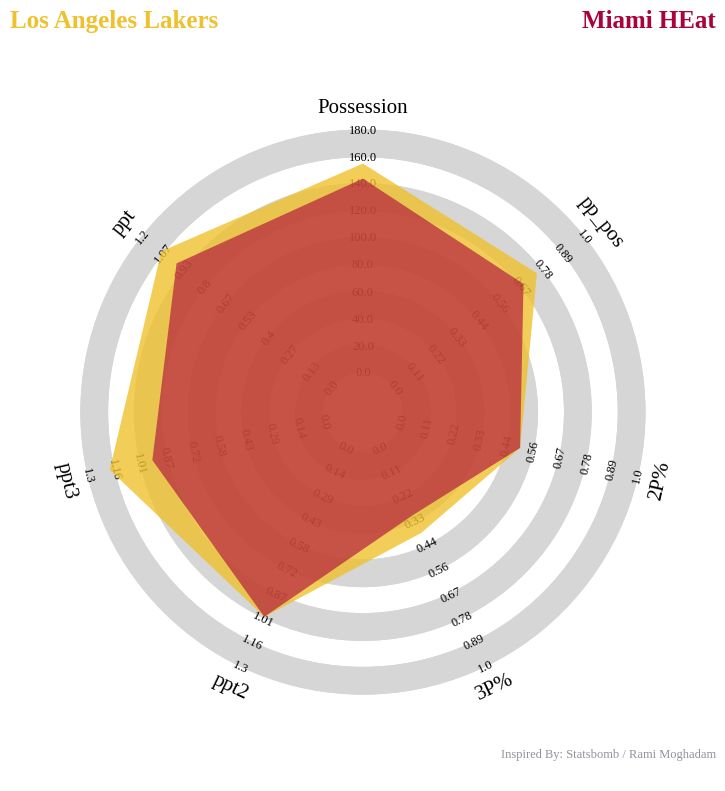

In [41]:
# Parameter names
params = ['Possession','pp_pos', '2P%', '3P%', 'ppt2','ppt3', 'ppt']

# Range Values
ranges = [(0.0, 180.0),(0, 1),(0.0, 1.0),(0.0, 1.0),(0.0, 1.3),(0.0, 1.3),(0.0, 1.2)]

# Parameter values
values = [
    [154.88, 0.75, 0.5, 0.39, 1.0, 1.18, 1.08],
    [143.16, 0.68, 0.5, 0.31, 1.0, 0.94, 0.98] ]

# Title values
title = dict(
    title_name='Los Angeles Lakers',
    title_color='#efc12d',
    #subtitle_name='',
    #subtitle_color='',
    title_name_2='Miami HEat',
    title_color_2='#aa023a',
    #subtitle_name_2='',
    #subtitle_color_2='',
    title_fontsize=18,
    subtitle_fontsize=15)


# Instantiate object
radar = Radar(label_fontsize=15, range_fontsize=9)

# Plot radar
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values,
                                 radar_color=['#efc12d', '#aa023a'],
                                 alphas=[0.8, 0.6], title=title,
                                 compare=True)

Ahora podemos observar de un simple vistazo, como los Lakers estuvieron por encima de los Miami en anotación